##☕ 0. Import libraries to work with


In [73]:
# Imports used to load and save the datasets
import pandas as pd
import numpy as np
from numpy.linalg import pinv
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Access your own Google Drive to load or save datasets directly you can mount it
from google.colab import drive
drive.mount('/content/drive')

# Import classic libraries
import random
import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Import ML libraries
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neural_network
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install catboost
from catboost import CatBoostClassifier

#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 🎵 1. Loading the dataset

### 🚆 1.1 Train dataset

In [57]:
import numpy as np
# VALENTINA'S PATH
# train_data = pd.read_csv("/content/drive/MyDrive/MLEARN_lab/competition/Lab9/ML-MATT-CompetitionQT2021_train.csv",index_col=0)

# ANA'S PATH
train_data = pd.read_csv("/content/drive/MyDrive/MATT/MLEARN_lab/competition/Lab9/ML-MATT-CompetitionQT2021_train.csv",index_col=0)

#shuffle data
train_data = train_data.sample(frac = 1).reset_index(drop=True)




### 🧪 1.2 Test dataset

In [58]:
# VALENTINA'S PATH
# test_data = pd.read_csv("/content/drive/MyDrive/MLEARN_lab/competition/Lab9/ML-MATT-CompetitionQT2021_test.csv",index_col=0)

# ANA'S PATH
test_data = pd.read_csv("/content/drive/MyDrive/MATT/MLEARN_lab/competition/Lab9/ML-MATT-CompetitionQT2021_test.csv",index_col=0)

# Save the data indices at the same positions before being processed by the models 
indexes = test_data.index

## ⛏  2. Prepare some functions

### 💌 2.1 Submission function

In [59]:
#Saving the submission file with correct indexes
def create_submission_csv(y_test):
    # Convert the output (y_test) to a dataframe and set the header name: 'genre'
    y_output = pd.DataFrame(y_test,columns=['genre'])

    # Insert the indexes saved previously as a column in the position 0 and name 'Id'
    y_output.insert(0, 'Id', indexes)

    # Save as a csv the DataFrame with argument index=False since there is already the column 'Id' with the indexes
    # VALENTINA'S PATH
    # y_output.to_csv('/content/drive/MyDrive/MLEARN_lab/competition/Lab9/submission_file.csv', index=False)

    # ANA'S PATH
    y_output.to_csv('/content/drive/MyDrive/MATT/MLEARN_lab/competition/Lab9/submission_file_GB.csv', index=False)

### 🔍 2.2 GridSearch Function

In [60]:
kfold = KFold(5)

def make_grid_search_cv(model, param_grid, transpose_y):
    grid_search_cv = GridSearchCV(estimator = model,
                                  param_grid= param_grid,
                                  cv=kfold, return_train_score=True)
                                  #cv=sklearn.model_selection.ShuffleSplit(n_splits=1, train_size=0.70, random_state=1), return_train_score=True)
    
    # Let's fit
    if transpose_y == True:
      grid_search_cv.fit(X_train, np.ravel(y_train)) #avoiding the warninig of the array of 1d
    else:
      grid_search_cv.fit(X_train, y_train)

    #Print best hyperparameter
    print("Best hyperparameters", grid_search_cv.best_params_)
    
    return grid_search_cv

### 👏 2.3 Result function

In [61]:
def result(model):
    # Make a prediction and analyse score and cmat
    pred_train = model.predict(X_train)

    train_error = 1. - accuracy_score(y_train, pred_train)
    print('Estimator train score: %f ' % model.score(X_train, y_train))
    print("Train_error :", train_error)

    pred_val = model.predict(X_val)
    
    val_error = 1. - accuracy_score(y_val, pred_val)
    print('Estimator validation score: %f ' % model.score(X_val, y_val))
    print("Validation_error :", val_error)

    train_cmat = confusion_matrix(y_train, pred_train)
    display = ConfusionMatrixDisplay(confusion_matrix=train_cmat)
    fig, ax = plt.subplots(figsize=(8,8))
    display.plot(ax=ax, values_format='')
    plt.show()

    
    val_cmat = confusion_matrix(y_val, pred_val)
    display = ConfusionMatrixDisplay(confusion_matrix=val_cmat)
    fig, ax = plt.subplots(figsize=(8,8))
    display.plot(ax=ax, values_format='')
    plt.show()

### 🙏 2.4 Make a prediction

In [62]:
def make_a_prediction(model):
    y_testpred = model.predict(X_test)

    create_submission_csv(y_testpred.astype(int))

## ❓ 3. Let's analyse our dataset

### 👀 3.1 First visualization

In [ ]:
train_data.head(5)

,duration_ms,key,mode,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,release_date,popularity,genre
Id,,,,,,,,,,,,,,,
9238,251594,7,1,-9.652,0.442,0.635,0.27300,0.8770,0.1590,0.0368,84.039,0.2130,2021-05-14,39,5
7394,294960,1,1,-33.366,0.993,0.335,0.00501,0.9190,0.0618,0.0451,132.085,0.0383,2018-07-27,65,6
5575,206583,1,0,-5.428,0.761,0.672,0.71400,0.0000,0.1010,0.2530,172.061,0.4090,2017-09-05,43,10
7002,258280,5,0,-5.749,0.409,0.820,0.63500,0.0000,0.2440,0.0772,101.024,0.5280,2020-02-29,68,12
6699,223173,5,1,-7.462,0.202,0.830,0.71100,0.0448,0.1370,0.0448,114.646,0.9010,1978-07-17,55,3


### 💢 3.2 Check nul values, types

In [ ]:
print("Nul values on train_dataset : \n", train_data.isnull().sum(axis = 0))

Nul values on train_dataset : 
 duration_ms         0
key                 0
mode                0
loudness            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
release_date        0
popularity          0
genre               0
dtype: int64


In [ ]:
print("Types of columns in train_dataset : \n", train_data.dtypes)

Types of columns in train_dataset : 
 duration_ms           int64
key                   int64
mode                  int64
loudness            float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
release_date         object
popularity            int64
genre                 int64
dtype: object


### 🪥 3.3 Clean bad type column for release_date

In [63]:
# Convert object into datetime
train_data['release_date'] = [datetime.datetime.strptime(dat, '%Y-%m-%d') if len(dat) == 10  else datetime.datetime.strptime(dat, '%Y-%m') 
if len(dat) == 7 else datetime.datetime.strptime(dat, '%Y') for dat in train_data['release_date']]

test_data['release_date'] = [datetime.datetime.strptime(dat, '%Y-%m-%d') if len(dat) == 10  else datetime.datetime.strptime(dat, '%Y-%m') 
if len(dat) == 7 else datetime.datetime.strptime(dat, '%Y') for dat in test_data['release_date']]

#Convert datetime into timestamp (float)
train_data['release_date'] = [datetime.datetime.timestamp(dat) for dat in train_data['release_date']]
test_data['release_date'] = [datetime.datetime.timestamp(dat) for dat in test_data['release_date']]

train_data.dtypes

duration_ms           int64
key                   int64
mode                  int64
loudness            float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
release_date        float64
popularity            int64
genre                 int64
dtype: object

In [ ]:
train_data.head(5)

,duration_ms,key,mode,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,release_date,popularity,genre
Id,,,,,,,,,,,,,,,
9238,251594,7,1,-9.652,0.442,0.635,0.27300,0.8770,0.1590,0.0368,84.039,0.2130,1.620950e+09,39,5
7394,294960,1,1,-33.366,0.993,0.335,0.00501,0.9190,0.0618,0.0451,132.085,0.0383,1.532650e+09,65,6
5575,206583,1,0,-5.428,0.761,0.672,0.71400,0.0000,0.1010,0.2530,172.061,0.4090,1.504570e+09,43,10
7002,258280,5,0,-5.749,0.409,0.820,0.63500,0.0000,0.2440,0.0772,101.024,0.5280,1.582934e+09,68,12
6699,223173,5,1,-7.462,0.202,0.830,0.71100,0.0448,0.1370,0.0448,114.646,0.9010,2.694816e+08,55,3


### 👓 3.4 Check repartition of each variables

In [ ]:
#infos = pd.plotting.scatter_matrix(train_data, figsize=(18,18))

In [ ]:
np.asarray(np.unique(train_data["genre"].values, return_counts=True)).T

array([[   0,  407],
       [   1,  449],
       [   2,  645],
       [   3,  617],
       [   4,  320],
       [   5,  353],
       [   6,  337],
       [   7,  442],
       [   8,  930],
       [   9,  526],
       [  10,  320],
       [  11,  388],
       [  12,  899],
       [  13, 1034],
       [  14,  696]])

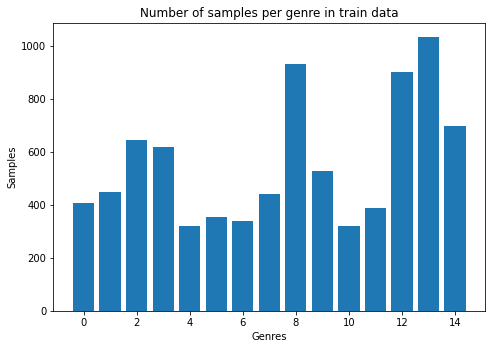

In [83]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],[407, 449, 645, 617, 320, 353, 337, 442, 930, 526, 320, 388, 899, 1034, 696])
ax.set_ylabel('Samples')
ax.set_xlabel('Genres')
ax.set_title('Number of samples per genre in train data')
plt.show()

### ✂ 3.5 Preprocessing data

In [ ]:
train_data.iloc[:,0:14] = StandardScaler(with_mean=True, with_std=False).fit_transform(train_data.iloc[:,0:14])
test_data = StandardScaler(with_mean=True, with_std=False).fit_transform(test_data)

train_data.head(5)

,duration_ms,key,mode,loudness,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,release_date,popularity,genre
Id,,,,,,,,,,,,,,,
9238,20508.984097,1.758699,0.366974,-0.894809,0.132822,0.026098,-0.329734,0.739814,-0.017975,-0.04929,-35.727946,-0.317825,4.484213e+08,-21.541672,5
7394,63874.984097,-4.241301,0.366974,-24.608809,0.683822,-0.273902,-0.597724,0.781814,-0.115175,-0.04099,12.318054,-0.492525,3.601205e+08,4.458328,6
5575,-24502.015903,-4.241301,-0.633026,3.329191,0.451822,0.063098,0.111266,-0.137186,-0.075975,0.16691,52.294054,-0.121825,3.320405e+08,-17.541672,10
7002,27194.984097,-0.241301,-0.633026,3.008191,0.099822,0.211098,0.032266,-0.137186,0.067025,-0.00889,-18.742946,-0.002825,4.104053e+08,7.458328,12
6699,-7912.015903,-0.241301,0.366974,1.295191,-0.107178,0.221098,0.108266,-0.092386,-0.039975,-0.04129,-5.120946,0.370175,-9.030475e+08,-5.541672,3


### 🎯 3.6 Check first correlation between variables and output 

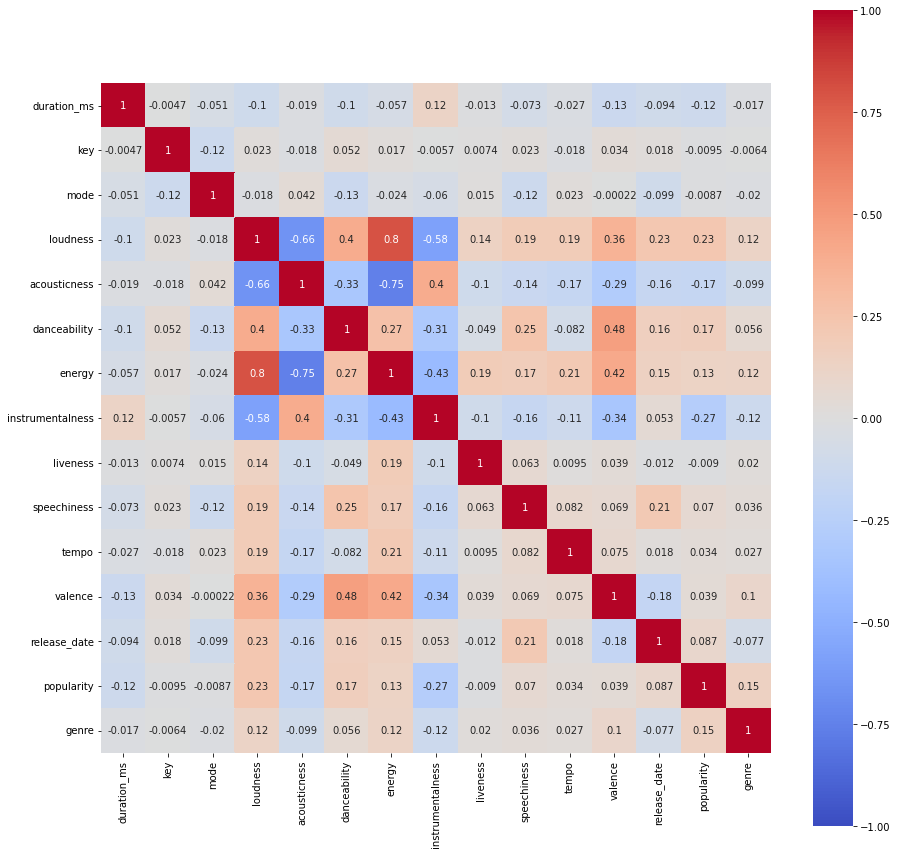

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

## ⏪ 4. Making a reduction of dimension

### 🚆 4.1 Create X_train and y_train

In [93]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
import imblearn
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

#x_train = train_data.iloc[0:7000,0:14].to_numpy()
#y_train = train_data.iloc[0:7000,14:15].to_numpy()

#rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
#x_train, y_train = rus.fit_resample(x_train, y_train)

#x_val = train_data.iloc[7001:8363,0:14].to_numpy()
#y_val = train_data.iloc[7001:8363,14:15].to_numpy()

#x_val, y_val = rus.fit_resample(x_val, y_val)


# summarize class distribution
#print("Before oversampling: ",Counter(y_train))
x_train = train_data.iloc[:,0:14]
y_train = np.ravel(train_data.iloc[:,14:15])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=1, stratify = y_train)

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train, y_train = SMOTE.fit_resample(x_train, y_train)
x_val, y_val = SMOTE.fit_resample(x_val, y_val)

# summarize class distribution
#print("After oversampling: ",Counter(y_train))


#x_train = train_data.iloc[:,0:14].to_numpy()
#y_train = train_data.iloc[:,14:15].to_numpy()


#print("X_train shape :", X_train.shape)
#print("y_train shape :", y_train.shape)

#print("X_val shape :", X_val.shape)
#print("y_val shape :", y_val.shape)

x_test = test_data

#train_data = train_data.drop('release_date', 1)
#test_data = test_data.drop('release_date', 1)

#x_train = train_data.iloc[:, 2:-1].to_numpy()
#y_train = train_data.iloc[:,-1].to_numpy()
#x_test = test_data.iloc[:, 2:].to_numpy()

#x_train_sp, x_validation_sp, y_train_sp, y_validation_sp = train_test_split(x_train, y_train, train_size=0.8, random_state=1, stratify = y_train)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=1, stratify = y_train)


#from sklearn.decomposition import PCA
#pca = PCA(n_components=9)
#pca.fit(x_train, y_train)
#x_train = pca.transform(x_train)
#x_test  = pca.transform(x_test)
#x_val = pca.transform(x_val)



rf = sklearn.ensemble.RandomForestClassifier(n_estimators=900, max_features= 9, max_depth= 15, random_state=42)

model = Pipeline([
    ('center', StandardScaler()),
    ('clf', rf)
])
model.fit(x_train, y_train)

pred_train_rf = model.predict(x_train)
pred_validation_rf = model.predict(x_val)

print("TRAINING\n" + classification_report(y_train, pred_train_rf))
print("\nVALIDATION\n" + classification_report(y_val, pred_validation_rf))
y_testpred = model.predict(x_test)

create_submission_csv(y_testpred.astype(int))

#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, x_train_sp, y_train_sp, cv=5)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#scores = cross_val_score(model, x_train_sp, y_train_sp, scoring='roc_auc', cv=cv, n_jobs=-1)
#scores



TRAINING
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       827
           1       0.96      0.96      0.96       827
           2       0.95      0.96      0.95       827
           3       0.97      0.95      0.96       827
           4       0.96      0.98      0.97       827
           5       0.96      0.97      0.96       827
           6       0.95      0.98      0.96       827
           7       0.98      0.96      0.97       827
           8       0.96      0.94      0.95       827
           9       0.96      0.96      0.96       827
          10       0.96      0.98      0.97       827
          11       0.97      0.98      0.98       827
          12       0.96      0.96      0.96       827
          13       0.98      0.95      0.97       827
          14       0.97      0.93      0.95       827

    accuracy                           0.96     12405
   macro avg       0.96      0.96      0.96     12405
weighted avg     

### ✂ 4.2 Making an MDA


In [ ]:
mda = LinearDiscriminantAnalysis(n_components=6)
mda.fit(X_train, y_train)
X_train = mda.transform(X_train)
X_test  = mda.transform(X_test)
X_val = mda.transform(X_val)


print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7000, 6)
(3585, 6)
(1362, 6)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ✂ 4.2 Making a PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)
X_val = pca.transform(X_val)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7000, 6)
(3585, 6)
(1362, 6)


## 🦾 5. Trying some ML models

###5.1 LDA and QDA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimator train score: 0.262429 
Train_error : 0.7375714285714285
Estimator validation score: 0.260455 
Validation_error : 0.739545121056493


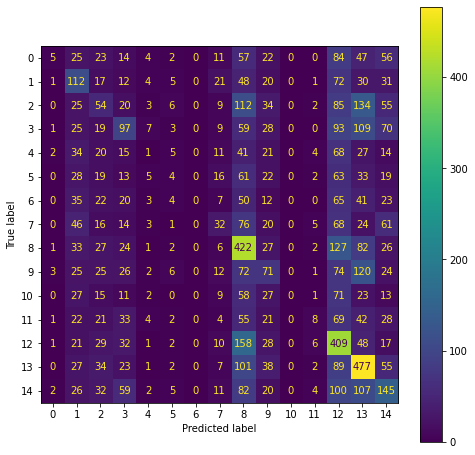

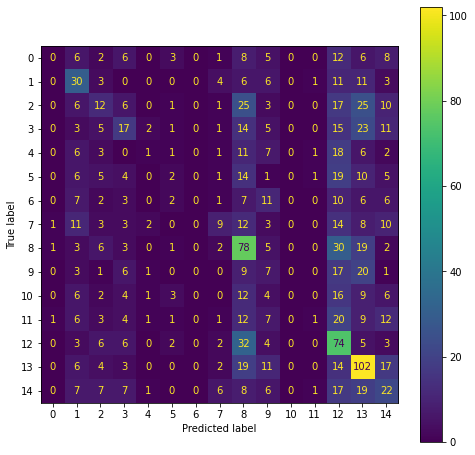

In [ ]:
lda = LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
lda_model = lda.fit(X_train, y_train)

result(lda_model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimator train score: 0.291286 
Train_error : 0.7087142857142857
Estimator validation score: 0.280264 
Validation_error : 0.7197358767424797


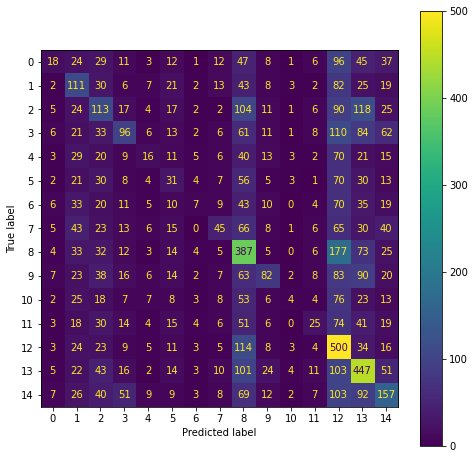

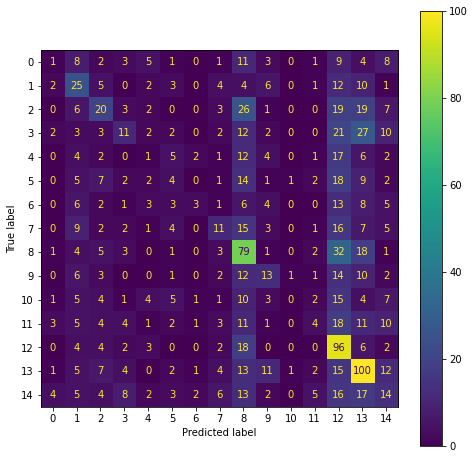

In [ ]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model = qda.fit(X_train, y_train)

result(qda_model)

###5.2 SVMs

In [ ]:
#Linear SVM

Cs = [0.1, 1, 10, 100, 500]

grid_search_cv_svm = make_grid_search_cv(SVC(kernel="linear"), {"C": Cs}, false)
result(grid_search_cv_svm)
make_a_prediction(grid_search_cv_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#Non-linear SVM
Cs = [0.1, 1, 10, 100, 500]
gammas = [1e-4, 1e-3, 1e-2, 1e-1, 1]

grid_search_cv_svm_nl = make_grid_search_cv(SVC(kernel="linear"), {"C": Cs, "gamma": gammas}, false)
result(grid_search_cv_svm_nl)
make_a_prediction(grid_search_cv_svm_nl)

###5.3 Parzen windows

In [ ]:
#Define Parzenclassifier 

class ParzenClassifier(BaseEstimator, ClassifierMixin):
    densities = {}  # Dictionary containing density estimation for each class.

    def __init__(self, bandwidth=1.0, kernel="gaussian"):
        self.bandwidth = bandwidth
        self.kernel = kernel

    def fit(self, X, y):
        self.classes_ = unique_labels(y)
        # Fit kernel density estimator (Parzen windows) for each class.
        for c in self.classes_:
            n = (y_train == c).sum()
            hn = self.bandwidth / np.sqrt(n)
            self.densities[c] = KernelDensity(bandwidth=hn, kernel=self.kernel).fit(X[y == c])
        return self

    def predict(self, X):
        y_pred = np.empty(X.shape[0])
        for idx, x in enumerate(X):
            # Estimate log-probability of sample for each class.
            log_probs = {c: self.densities[c].score_samples(x.reshape(1, -1))
                         for c in self.classes_}
            y_pred[idx] = max(log_probs, key=log_probs.get)
        
        return y_pred

Train_error : 0.3996173621906015


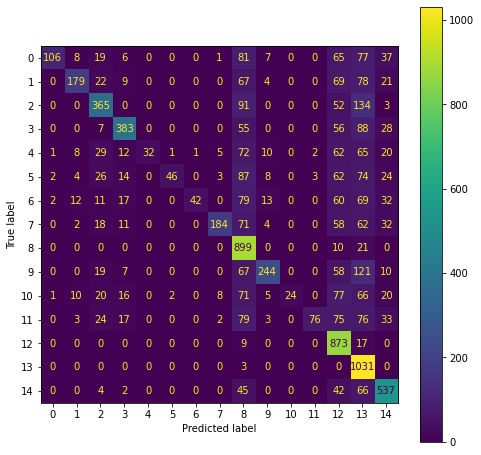

In [ ]:
Hs = [1, 5, 10, 15, 20]

parzen_model = ParzenClassifier()

grid_search_cv_parzen = make_grid_search_cv(parzen_model, {"bandwidth": Hs}, false)
result(grid_search_cv_parzen)
make_a_prediction(grid_search_cv_parzen)

### 5.4 KNN

Train_error : 0.0815496831280641


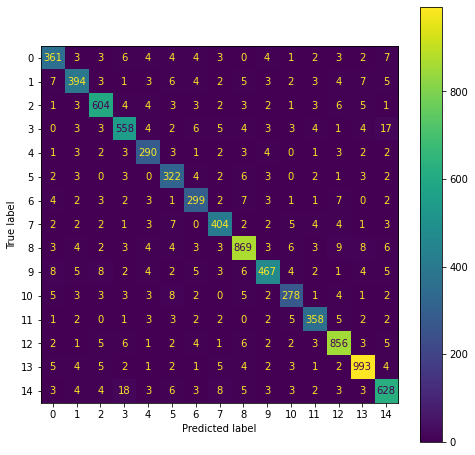

In [ ]:
Ks = [1, 3, 5, 8, 9] 

knn_model = KNeighborsClassifier()

grid_search_cv_knn = make_grid_search_cv(knn_model, {"n_neighbors": Ks}, False)
result(grid_search_cv_knn)
make_a_prediction(grid_search_cv_knn)

### 5.5 RandomForest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Estimator train score: 0.932000 
Train_error : 0.06799999999999995
Estimator validation score: 0.297872 
Validation_error : 0.7021276595744681


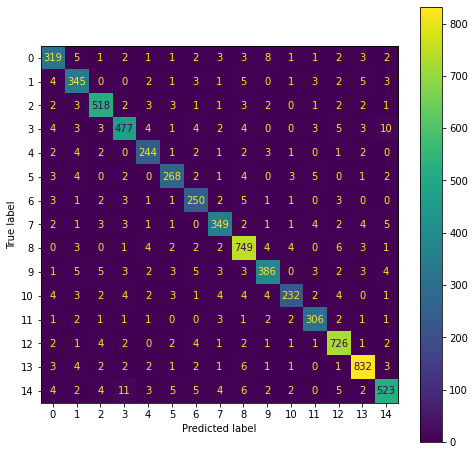

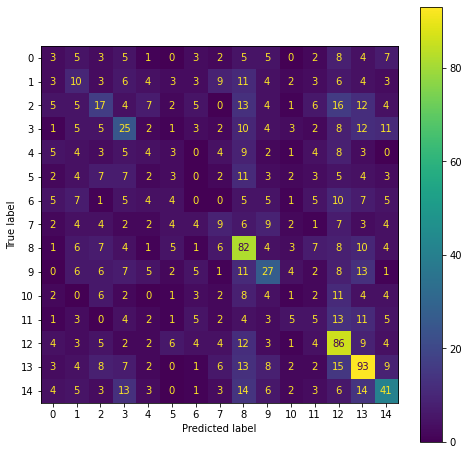

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#leaf_nodes = [2, 10, 100, 500, 700, 1000]
#samples_split = [2, 3, 4, 10, 20]

# This code is the one that gave us the best perfomance by the moment
rnd_clf = RandomForestClassifier(n_estimators=300, random_state=42)
rnd_clf.fit(X_train, y_train)
##### no use this: rnd_clf.fit(X_val, y_val)
result(rnd_clf)
make_a_prediction(rnd_clf)


#rf_model = RandomForestClassifier()

#grid_search_cv_rf = make_grid_search_cv(rf_model, {"max_leaf_nodes": leaf_nodes, "min_samples_split": samples_split}, false)
#result(grid_search_cv_rf)
#make_a_prediction(grid_search_cv_rf)
#grid_search_cv_rf.best_params_


### 5.6 Decision Tree

Best hyperparameters {'ccp_alpha': 0.0001}
Estimator train score: 0.919976 
Train_error : 0.08002392344497611
Estimator validation score: 0.500000 
Validation_error : 0.5


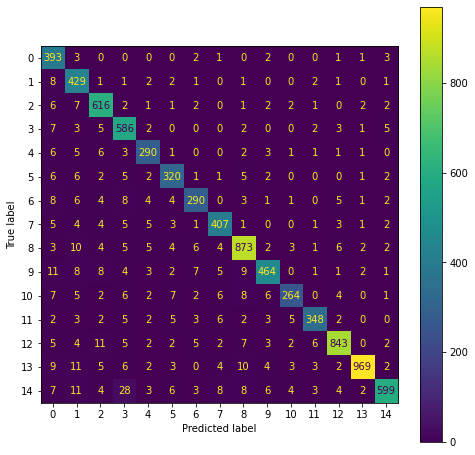

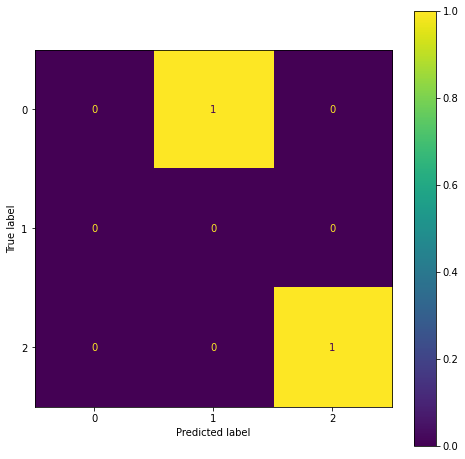

In [ ]:
ccp_alphas = [0.00001, 0.0001, 0.001]

tree_model = DecisionTreeClassifier(max_features="auto", random_state=42, criterion="entropy")

grid_search_cv_tree = make_grid_search_cv(tree_model, {"ccp_alpha": ccp_alphas}, False)
result(grid_search_cv_tree)
make_a_prediction(grid_search_cv_tree)

### 5.7 MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Best hyperparameters {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
Estimator train score: 0.307000 
Train_error : 0.6930000000000001
Estimator validation score: 0.291483 
Validation_error : 0.7085168869309839


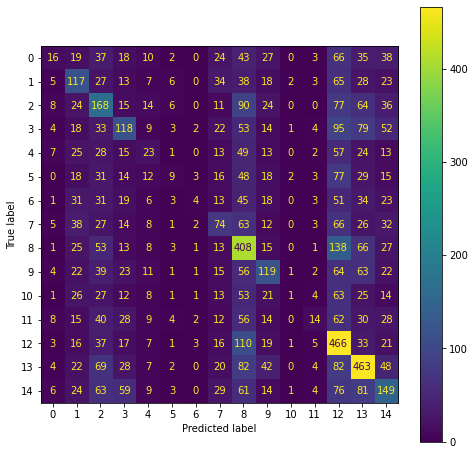

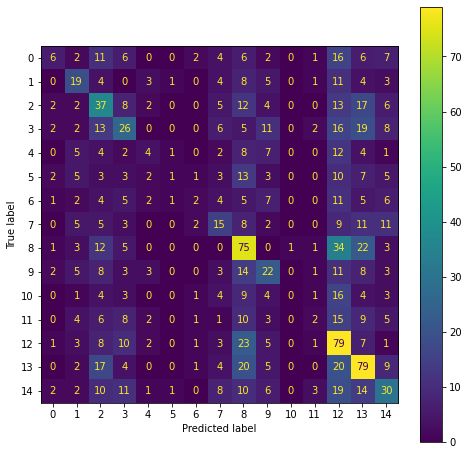

In [ ]:
hidden_layer_sizes = [(50,), (100,)]
activation = ["logistic", "relu"]
alpha = [0.0001, 0.001]
learning_rate = ["constant", "adaptive"]
learning_rate_init = [0.001, 0.01]

mlp_model = sklearn.neural_network.MLPClassifier(max_iter=100, solver="sgd", activation = "relu", random_state=42)

grid_search_cv_mlp = make_grid_search_cv(mlp_model, {"hidden_layer_sizes": hidden_layer_sizes, "learning_rate_init": learning_rate_init, "alpha": alpha}, True)
result(grid_search_cv_mlp)
make_a_prediction(grid_search_cv_mlp)


### 5.8 Extra Trees Classifier

Best hyperparameters {'ccp_alpha': 0.001}
Estimator train score: 0.247714 
Train_error : 0.7522857142857142
Estimator validation score: 0.251101 
Validation_error : 0.748898678414097


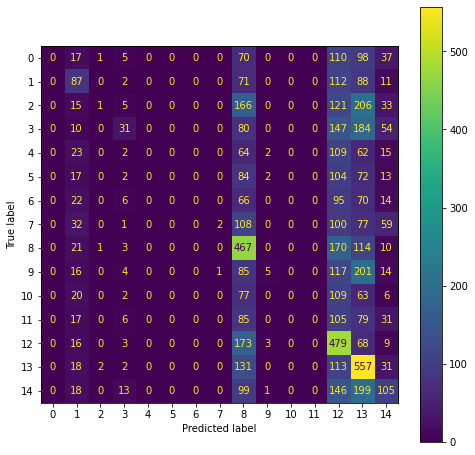

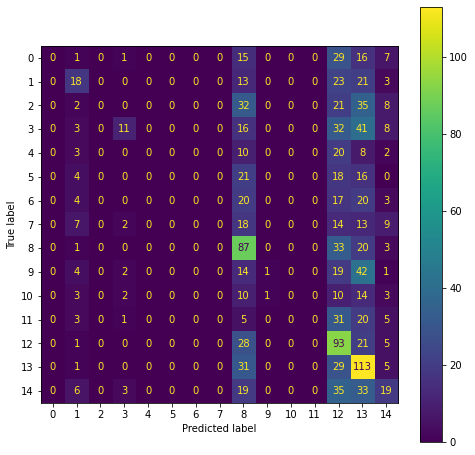

In [ ]:
ccp_alphas = [0.001, 0.05]

etr_model = ExtraTreesClassifier(random_state=42)
grid_search_cv_etr = make_grid_search_cv(etr_model, {"ccp_alpha": ccp_alphas}, True)
result(grid_search_cv_etr)
make_a_prediction(grid_search_cv_etr)

### 5.9 SVR

In [ ]:
Cs = [0.1, 1, 10]

svr_model = svm.SVR(kernel='linear')

grid_search_cv_svr = make_grid_search_cv(svr_model, {"C": Cs}, False)
result(grid_search_cv_svr)
make_a_prediction(grid_search_cv_svr)

### 6.0 CNN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import SGD

def keras_model(input_shape=(150,150,3)):
    """ VGG-like convnet — according to https://keras.io/getting-started/sequential-model-guide/#specifying-the-input-shape"""
    model = Sequential()
    # input: 150x150 images with 1 channels -> (150, 150, 1) tensors.
    # this applies 32 convolution filters of size 3x3 each.
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25)) # 25% to be dropped = leaving 75% of the fraction inputs neurons

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

cnn_model = keras_model()

grid_search_cv_cnn = make_grid_search_cv(cnn_model, XXX, false)
result(grid_search_cv_svr)
make_a_prediction(grid_search_cv_svr)

## 💞 6. Ensembles

### 6.1 Hard Voting

In [ ]:
voting_hard_model = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

result(voting_hard_model.fit(X_train, y_train))

### 6.2 Soft Voting

In [ ]:
voting_soft_model = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

result(voting_soft_model.fit(X_train, y_train))

### 6.3 Bagging

In [ ]:
bagging_model = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

### 6.4 AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

### 5.4 GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

estimators = [10, 100, 150]
depth = [1, 5, 10]

gradiant_boosting_model = GradientBoostingClassifier(learning_rate=1.0, random_state=42)

grid_search_cv_GB = make_grid_search_cv(gradiant_boosting_model, {"n_estimators": estimators, "max_depth": depth}, False)
result(grid_search_cv_GB)
make_a_prediction(grid_search_cv_GB)

### 6.5 XGBoost

Estimator train score: 0.451286 
Train_error : 0.5487142857142857
Estimator validation score: 0.285609 
Validation_error : 0.7143906020558003


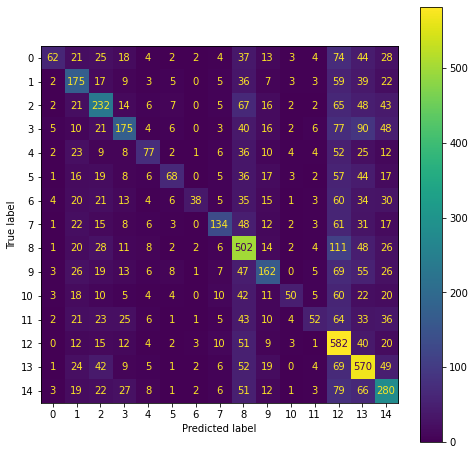

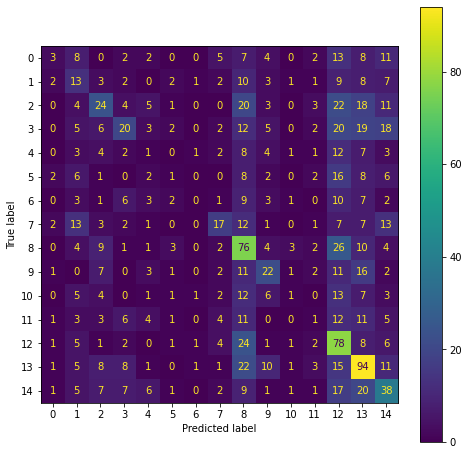

In [ ]:
#!pip install xgboost

#from xgboost import XGBClassifier

xg = XGBClassifier(eta = "0.5", gamma = "0.1", max_depth = 4)

xg_model = xg.fit(X_train, np.ravel(y_train))

result(xg_model)

### 6.6 Catboost

0:	learn: 2.4506659	total: 36.1ms	remaining: 36s
1:	learn: 2.3743121	total: 65.7ms	remaining: 32.8s
2:	learn: 2.3309998	total: 94.7ms	remaining: 31.5s
3:	learn: 2.2963519	total: 124ms	remaining: 30.9s
4:	learn: 2.2806307	total: 156ms	remaining: 31s
5:	learn: 2.2680276	total: 184ms	remaining: 30.5s
6:	learn: 2.2434548	total: 216ms	remaining: 30.6s
7:	learn: 2.2239502	total: 249ms	remaining: 30.9s
8:	learn: 2.2099886	total: 280ms	remaining: 30.8s
9:	learn: 2.1928126	total: 308ms	remaining: 30.5s
10:	learn: 2.1794948	total: 339ms	remaining: 30.5s
11:	learn: 2.1687079	total: 367ms	remaining: 30.2s
12:	learn: 2.1601556	total: 396ms	remaining: 30.1s
13:	learn: 2.1516149	total: 425ms	remaining: 29.9s
14:	learn: 2.1359213	total: 461ms	remaining: 30.3s
15:	learn: 2.1188559	total: 490ms	remaining: 30.1s
16:	learn: 2.1086144	total: 519ms	remaining: 30s
17:	learn: 2.0989684	total: 554ms	remaining: 30.2s
18:	learn: 2.0846427	total: 583ms	remaining: 30.1s
19:	learn: 2.0778030	total: 612ms	remaining:

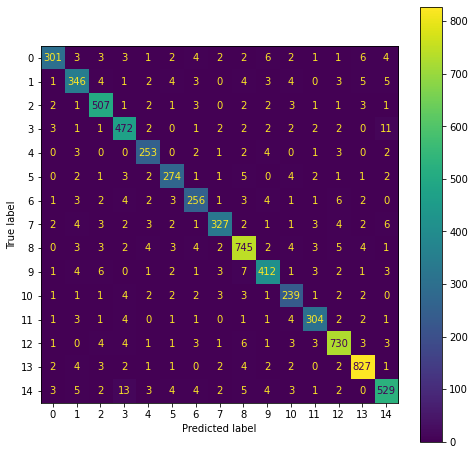

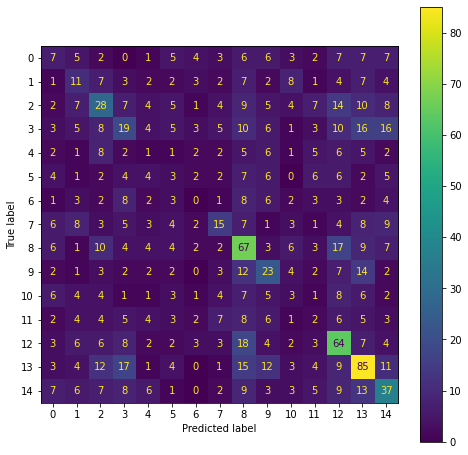

In [ ]:
cb = CatBoostClassifier(task_type="CPU", learning_rate=0.5)
cb_model = cb.fit(X_train, y_train)

result(cb_model)